In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import os
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
os.chdir("/mnt/batch/tasks/shared/LS_root/mounts/clusters/dsvdm/code/Users/Tamilselvan.S/Press Release/Data")
df=pd.read_csv("PR_FINAL_CLEANED.csv")

In [4]:
df.head()

Category Date of release  \
0  Corporate Information      2021-04-01   
1  Corporate Information      2021-04-01   
2  Corporate Information      2021-04-02   
3               Offering      2021-04-05   
4  Corporate Information      2021-04-06   

                                    Title / Contents          Issued by  \
0  NTT DATA Ranked No. 8 in Brand Finance's Lates...           NTT DATA   
1  Effective April 1, 2021: itelligence | NTT DAT...           NTT DATA   
2  NTT DATA to publish Digital Thought Leadership...           NTT DATA   
3     Transformer Neural Networks are Shaking up AI   NTT DATA Services   
4  NTT DATA Achieves Key AWS Partner Network Mile...  NTT DATA Services   

  Country Language                                        Description  \
0  Global  English  TOKYO – Apr 1, 2021 – NTT DATA, a global digit...   
1  Global  English  March 30, 2021\n itelligence | NTT DATA Busine...   
2  Global  English  TOKYO – Apr 2, 2021 – NTT DATA, a global digit...   
3      US  English  Scott Boettcher, vice president of data intell...   
4      US  English  PLANO, Texas – April 5, 2021 – NTT DATA Servic...   

                                                 URL Marketing Contact  \
0  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
1  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   
2  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
3  https://searchenterpriseai.techtarget.com/feat...           Amy Baj   
4  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   

  E mail for Marketing Contact  Quarter  Unique Count  Company Issued_Short  \
0          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
1          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
2          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
3          amy.baj@nttdata.com  2021 Q1           NaN      NaN     Services   
4          amy.baj@nttdata.com  2021 Q1           NaN      NaN     Services   

                                        Description1  \
0  tokyo – apr 1 2021 – a global digital business...   
1  march 30 2021 itelligence business solutions i...   
2  tokyo – apr 2 2021 – a global digital business...   
3  scott boettcher vice president intelligence se...   
4  plano texas – april 5 2021 – services a global...   

                                   Title / Contents1  \
0              ranked 8 brand finances latest report   
1  effective april 1 2021 itelligence business so...   
2      publish digital thought leadership automotive   
3             transformer neural networks shaking ai   
4        achieves key aws partner network milestones   

                                                Text  
0  ranked 8 brand finances latest report tokyo – ...  
1  effective april 1 2021 itelligence business so...  
2  publish digital thought leadership automotive ...  
3  transformer neural networks shaking ai scott b...  
4  achieves key aws partner network milestones pl...

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = TfidfVectorizer(analyzer='word',       
                             min_df=8,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern = '[a-zA-Z]{3,}',  # num chars > 3
                             max_features=500,             # max number of uniq words
                             ngram_range = (1, 3)
                    )



In [6]:
train,test= train_test_split(df,test_size=0.3,random_state=26)


In [7]:
xtrain1= cv.fit_transform(train['Text'])
xtest1= cv.transform(test['Text'])
encode = LabelEncoder()
ytrain1 = encode.fit_transform(train['Category'])
ytest1 = encode.transform(test['Category'])

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
clf_svm1 = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001))

# clf_svm1 = OneVsRestClassifier(SVC(C=0.8))
clf_svm1.fit(xtrain1, ytrain1)
pred_train2=clf_svm1.predict(xtrain1)
pred_test2=clf_svm1.predict(xtest1)


# Evaluating the model
print(f"Classification Report : \n\n{classification_report(ytrain1, pred_train2)}")
print(f"Classification Report : \n\n{classification_report(ytest1, pred_test2)}")

Iteration 1, loss = 0.67784531
Iteration 2, loss = 0.67625762
Iteration 3, loss = 0.67383654
Iteration 4, loss = 0.67071798
Iteration 5, loss = 0.66721871
Iteration 6, loss = 0.66326978
Iteration 7, loss = 0.65903193
Iteration 8, loss = 0.65478233
Iteration 9, loss = 0.65027875
Iteration 10, loss = 0.64566443
Iteration 11, loss = 0.64115114
Iteration 12, loss = 0.63669690
Iteration 13, loss = 0.63206304
Iteration 14, loss = 0.62764396
Iteration 15, loss = 0.62319226
Iteration 16, loss = 0.61897605
Iteration 17, loss = 0.61501332
Iteration 18, loss = 0.61076741
Iteration 19, loss = 0.60685483
Iteration 20, loss = 0.60316146
Iteration 21, loss = 0.59916744
Iteration 22, loss = 0.59568544
Iteration 23, loss = 0.59210912
Iteration 24, loss = 0.58874208
Iteration 25, loss = 0.58545791
Iteration 26, loss = 0.58233842
Iteration 27, loss = 0.57930133
Iteration 28, loss = 0.57630276
Iteration 29, loss = 0.57337695
Iteration 30, loss = 0.57052234
Iteration 31, loss = 0.56797273
Iteration 32, los

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.46032987
Iteration 32, loss = 0.45533832
Iteration 33, loss = 0.45045100
Iteration 34, loss = 0.44545097
Iteration 35, loss = 0.44068847
Iteration 36, loss = 0.43628748
Iteration 37, loss = 0.43180037
Iteration 38, loss = 0.42766796
Iteration 39, loss = 0.42344904
Iteration 40, loss = 0.41955504
Iteration 41, loss = 0.41559183
Iteration 42, loss = 0.41187320
Iteration 43, loss = 0.40826566
Iteration 44, loss = 0.40468325
Iteration 45, loss = 0.40127803
Iteration 46, loss = 0.39814853
Iteration 47, loss = 0.39484768
Iteration 48, loss = 0.39168796
Iteration 49, loss = 0.38871848
Iteration 50, loss = 0.38588513
Iteration 51, loss = 0.38302348
Iteration 52, loss = 0.38022789
Iteration 53, loss = 0.37760927
Iteration 54, loss = 0.37506437
Iteration 55, loss = 0.37261751
Iteration 56, loss = 0.37024009
Iteration 57, loss = 0.36786200
Iteration 58, loss = 0.36563791
Iteration 59, loss = 0.36336617
Iteration 60, loss = 0.36122540
Iteration 61, loss = 0.35918121
Iteratio

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.48990734
Iteration 25, loss = 0.48295414
Iteration 26, loss = 0.47637009
Iteration 27, loss = 0.47000219
Iteration 28, loss = 0.46381667
Iteration 29, loss = 0.45781025
Iteration 30, loss = 0.45208643
Iteration 31, loss = 0.44645842
Iteration 32, loss = 0.44089603
Iteration 33, loss = 0.43558364
Iteration 34, loss = 0.43035382
Iteration 35, loss = 0.42553841
Iteration 36, loss = 0.42076370
Iteration 37, loss = 0.41596212
Iteration 38, loss = 0.41148897
Iteration 39, loss = 0.40710295
Iteration 40, loss = 0.40280770
Iteration 41, loss = 0.39873821
Iteration 42, loss = 0.39469687
Iteration 43, loss = 0.39085358
Iteration 44, loss = 0.38704948
Iteration 45, loss = 0.38357381
Iteration 46, loss = 0.37993619
Iteration 47, loss = 0.37650285
Iteration 48, loss = 0.37314720
Iteration 49, loss = 0.36991683
Iteration 50, loss = 0.36677950
Iteration 51, loss = 0.36382950
Iteration 52, loss = 0.36090362
Iteration 53, loss = 0.35808626
Iteration 54, loss = 0.35524850
Iteratio

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.68191136
Iteration 2, loss = 0.68122829
Iteration 3, loss = 0.68016654
Iteration 4, loss = 0.67882176
Iteration 5, loss = 0.67727189
Iteration 6, loss = 0.67554188
Iteration 7, loss = 0.67375197
Iteration 8, loss = 0.67188167
Iteration 9, loss = 0.67000380
Iteration 10, loss = 0.66787941
Iteration 11, loss = 0.66595648
Iteration 12, loss = 0.66404697
Iteration 13, loss = 0.66206824
Iteration 14, loss = 0.66007064
Iteration 15, loss = 0.65828066
Iteration 16, loss = 0.65643023
Iteration 17, loss = 0.65452000
Iteration 18, loss = 0.65294497
Iteration 19, loss = 0.65119530
Iteration 20, loss = 0.64947106
Iteration 21, loss = 0.64786130
Iteration 22, loss = 0.64632427
Iteration 23, loss = 0.64487770
Iteration 24, loss = 0.64333737
Iteration 25, loss = 0.64209729
Iteration 26, loss = 0.64071812
Iteration 27, loss = 0.63932887
Iteration 28, loss = 0.63803296
Iteration 29, loss = 0.63690895
Iteration 30, loss = 0.63566687
Iteration 31, loss = 0.63459593
Iteration 32, los

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.39413365
Iteration 30, loss = 0.38654813
Iteration 31, loss = 0.37912305
Iteration 32, loss = 0.37184700
Iteration 33, loss = 0.36485633
Iteration 34, loss = 0.35812572
Iteration 35, loss = 0.35149250
Iteration 36, loss = 0.34509697
Iteration 37, loss = 0.33898672
Iteration 38, loss = 0.33283927
Iteration 39, loss = 0.32697635
Iteration 40, loss = 0.32135832
Iteration 41, loss = 0.31590105
Iteration 42, loss = 0.31051692
Iteration 43, loss = 0.30529369
Iteration 44, loss = 0.30027083
Iteration 45, loss = 0.29532978
Iteration 46, loss = 0.29054812
Iteration 47, loss = 0.28590059
Iteration 48, loss = 0.28132476
Iteration 49, loss = 0.27700161
Iteration 50, loss = 0.27263790
Iteration 51, loss = 0.26854735
Iteration 52, loss = 0.26446047
Iteration 53, loss = 0.26048451
Iteration 54, loss = 0.25669087
Iteration 55, loss = 0.25289448
Iteration 56, loss = 0.24927571
Iteration 57, loss = 0.24574976
Iteration 58, loss = 0.24229459
Iteration 59, loss = 0.23893161
Iteratio

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.58502929
Iteration 20, loss = 0.58011786
Iteration 21, loss = 0.57535720
Iteration 22, loss = 0.57096344
Iteration 23, loss = 0.56648507
Iteration 24, loss = 0.56229844
Iteration 25, loss = 0.55788198
Iteration 26, loss = 0.55399053
Iteration 27, loss = 0.55015163
Iteration 28, loss = 0.54651161
Iteration 29, loss = 0.54279277
Iteration 30, loss = 0.53927715
Iteration 31, loss = 0.53581843
Iteration 32, loss = 0.53251654
Iteration 33, loss = 0.52935688
Iteration 34, loss = 0.52629516
Iteration 35, loss = 0.52327802
Iteration 36, loss = 0.52042137
Iteration 37, loss = 0.51758472
Iteration 38, loss = 0.51491378
Iteration 39, loss = 0.51235699
Iteration 40, loss = 0.50987443
Iteration 41, loss = 0.50733093
Iteration 42, loss = 0.50517283
Iteration 43, loss = 0.50279781
Iteration 44, loss = 0.50064369
Iteration 45, loss = 0.49856774
Iteration 46, loss = 0.49653151
Iteration 47, loss = 0.49452435
Iteration 48, loss = 0.49270216
Iteration 49, loss = 0.49090744
Iteratio

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.59935964
Iteration 15, loss = 0.59307670
Iteration 16, loss = 0.58686956
Iteration 17, loss = 0.58083315
Iteration 18, loss = 0.57499751
Iteration 19, loss = 0.56903305
Iteration 20, loss = 0.56375237
Iteration 21, loss = 0.55829323
Iteration 22, loss = 0.55289854
Iteration 23, loss = 0.54797349
Iteration 24, loss = 0.54285962
Iteration 25, loss = 0.53808945
Iteration 26, loss = 0.53358413
Iteration 27, loss = 0.52900039
Iteration 28, loss = 0.52459288
Iteration 29, loss = 0.52037540
Iteration 30, loss = 0.51640675
Iteration 31, loss = 0.51233563
Iteration 32, loss = 0.50855830
Iteration 33, loss = 0.50486911
Iteration 34, loss = 0.50121265
Iteration 35, loss = 0.49776222
Iteration 36, loss = 0.49450040
Iteration 37, loss = 0.49132909
Iteration 38, loss = 0.48811749
Iteration 39, loss = 0.48519035
Iteration 40, loss = 0.48212413
Iteration 41, loss = 0.47944344
Iteration 42, loss = 0.47666481
Iteration 43, loss = 0.47405961
Iteration 44, loss = 0.47163497
Iteratio

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.66203026
Iteration 3, loss = 0.65597276
Iteration 4, loss = 0.64836054
Iteration 5, loss = 0.63944299
Iteration 6, loss = 0.62963817
Iteration 7, loss = 0.61925397
Iteration 8, loss = 0.60824055
Iteration 9, loss = 0.59696675
Iteration 10, loss = 0.58552195
Iteration 11, loss = 0.57403672
Iteration 12, loss = 0.56259378
Iteration 13, loss = 0.55126608
Iteration 14, loss = 0.53995922
Iteration 15, loss = 0.52887627
Iteration 16, loss = 0.51793230
Iteration 17, loss = 0.50727164
Iteration 18, loss = 0.49677710
Iteration 19, loss = 0.48666114
Iteration 20, loss = 0.47664994
Iteration 21, loss = 0.46709364
Iteration 22, loss = 0.45760176
Iteration 23, loss = 0.44840886
Iteration 24, loss = 0.43949039
Iteration 25, loss = 0.43081705
Iteration 26, loss = 0.42216420
Iteration 27, loss = 0.41402504
Iteration 28, loss = 0.40610162
Iteration 29, loss = 0.39833845
Iteration 30, loss = 0.39077410
Iteration 31, loss = 0.38344349
Iteration 32, loss = 0.37640889
Iteration 33, lo

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: Un

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer

clf_svm1 = OneVsRestClassifier(SVC(C=0.8))
clf_svm1.fit(xtrain1, ytrain1)
pred_train2=clf_svm1.predict(xtrain1)
pred_test2=clf_svm1.predict(xtest1)

# Evaluating the model
print(f"Classification Report : \n\n{classification_report(ytrain1, pred_train2)}")
print(f"Classification Report : \n\n{classification_report(ytest1, pred_test2)}")

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.97      0.97      0.97        31
           2       0.96      1.00      0.98        27
           3       0.98      0.99      0.99       104
           4       1.00      1.00      1.00         8
           5       1.00      0.96      0.98        57
           6       1.00      0.96      0.98        49
           7       1.00      1.00      1.00         9

    accuracy                           0.98       354
   macro avg       0.98      0.98      0.98       354
weighted avg       0.98      0.98      0.98       354

Classification Report : 

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.62      0.87      0.72        15
           2       0.80      0.63      0.71        19
           3       0.61      0.85      0.71        46
           4       1.00   

In [12]:
pred = encode.inverse_transform(pred_test2)
actual = encode.inverse_transform(ytest1)

In [13]:
testdata=test

In [14]:
testdata['pred'] = pred
testdata['actual'] = actual


In [15]:
testdata

Category Date of release  \
130        Award/Contest Winner      2021-07-13   
187                      Others      2021-09-28   
129        Business Partnership      2021-07-12   
32        Corporate Information      2021-04-30   
36   AR Report / Market Insight      2021-05-04   
..                          ...             ...   
239                    Offering      2021-11-22   
275                      Others      2022-01-10   
273        Business Partnership      2022-01-07   
271        Merger & Acquisition      2022-01-06   
61         Business Partnership      2021-05-20   

                                      Title / Contents          Issued by  \
130  CSU Pueblo’s Campus COVID Response Judged Amon...  NTT DATA Services   
187  NTT DATA Ranks No. 6 on IDC FinTech Rankings E...   NTT DATA Romania   
129  NTT DATA UK announces new partnership with rou...        NTT DATA UK   
32   NTT DATA Group Companies, everis and itelligen...           NTT DATA   
36   Why States Should Modernize and Future Proof A...  NTT DATA Services   
..                                                 ...                ...   
239                            Digital With a Purpose   NTT DATA Services   
275       HIStalk Interviews Lisa Esch, SVP, NTT DATA   NTT DATA Services   
273            Smart Park Pilot Launched in Las Vegas   NTT DATA Services   
271  NTT DATA Completes Acquisition of Chainalytics...  NTT DATA Services   
61   Edmonton Airport Developing App for On Demand ...  NTT DATA Services   

     Country Language                                        Description  \
130       US  English  The American Association of State Colleges and...   
187  Romania  English  September 28, 2021, Cluj-Napoca - NTT DATA, a ...   
129       UK  English  NTT DATA UK has announced a new partnership wi...   
32    Global  English  April 30, 2021, Tokyo – NTT DATA, a leading di...   
36        US  English  COMMENTARY | States have largely ignored IT mo...   
..       ...      ...                                                ...   
239       US  English  In 2020 with the pandemic we got a sample of t...   
275       US  English  I’ve been with the company for a little over a...   
273       US  English  Clark County, Nevada, is partnering with NTT t...   
271       US  English  PLANO, Texas – Jan. 6, 2022 – NTT DATA Service...   
61        US  English  Edmonton’s airport is teaming up with a Japane...   

                                                   URL Marketing Contact  \
130  https://www.denverpost.com/2021/07/13/csu-pueb...           Amy Baj   
187  https://ro.nttdata.com/insights/press-releases...       Axenia Sova   
129  https://uk.nttdata.com/news/ntt-data-uk-announ...         Jon Burch   
32   https://www.nttdata.com/global/en/media/press-...           Amy Baj   
36   https://www.route-fifty.com/tech-data/2021/05/...           Amy Baj   
..                                                 ...               ...   
239  https://vmblog.com/archive/2021/11/22/ntt-data...           Amy Baj   
275  https://histalk2.com/2022/01/10/histalk-interv...           Amy Baj   
273  https://www.smartcitiesworld.net/parks-and-gre...           Amy Baj   
271  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   
61   https://edmontonjournal.com/technology/tech-bi...           Amy Baj   

    E mail for Marketing Contact  Quarter  Unique Count  Company Issued_Short  \
130          amy.baj@nttdata.com  2021 Q2           NaN      NaN     Services   
187       axenia.sova@nttdata.ro  2021 Q2           NaN      NaN      Romania   
129   Jonathan.Burch@nttdata.com  2021 Q2           NaN      NaN           UK   
32           amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
36           amy.baj@nttdata.com  2021 Q1           NaN      NaN     Services   
..                           ...      ...           ...      ...          ...   
239          amy.baj@nttdata.com  2021 Q3           NaN      NaN     Services   
275        

In [20]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 17.4 MB/s eta 0:00:01


In [21]:
df=pd.read_excel("Actual_predicted (1).xlsx",engine='openpyxl', sheet_name = -1)

In [22]:
df.head(2)

Category      Date of release  \
0  Corporate Information  2021-01-04 00:00:00   
1  Corporate Information  2021-01-04 00:00:00   

                                    Title / Contents Issued by Country  \
0  NTT DATA Ranked No. 8 in Brand Finance's Lates...  NTT DATA  Global   
1  Effective April 1, 2021: itelligence | NTT DAT...  NTT DATA  Global   

  Language                                        Description  \
0  English  TOKYO ÃƒÂ¢Ã¢â€šÂ¬Ã¢â‚¬Å“ Apr 1, 2021 ÃƒÂ¢Ã¢â€š...   
1  English  March 30, 2021\n itelligence | NTT DATA Busine...   

                                                 URL Marketing Contact  \
0  https://www.nttdata.com/global/en/media/press-...           Amy Baj   
1  https://us.nttdata.com/en/news/press-release/2...           Amy Baj   

  E mail for Marketing Contact  Quarter  Unique Count  Company Issued_Short  \
0          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   
1          amy.baj@nttdata.com  2021 Q1           NaN      NaN  Global (HQ)   

  Mannual Classification Deeplearning Classification Mismatch  
0  Corporate Information       Corporate Information       No  
1  Corporate Information       Corporate Information       No

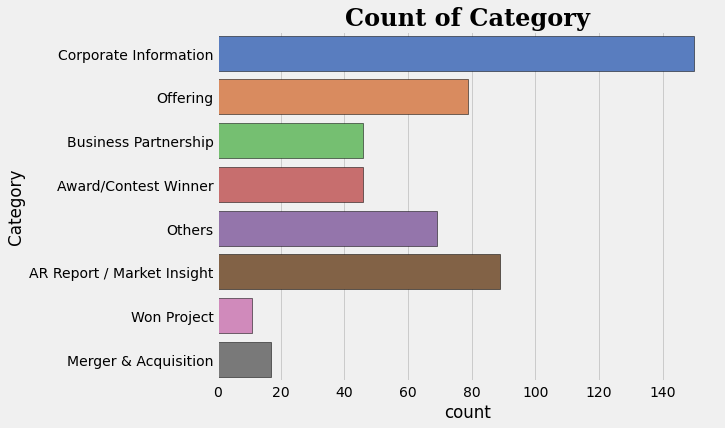

In [31]:
plt.figure(figsize=(8,6))
plt.style.use("fivethirtyeight")
plt.title("Count of Category",fontsize=18, fontweight='bold', fontfamily='serif')
sns.countplot(y=df['Category'],edgecolor='black', palette="muted")
plt.show()
plt.savefig('Country.png',bbox_inches = "tight")

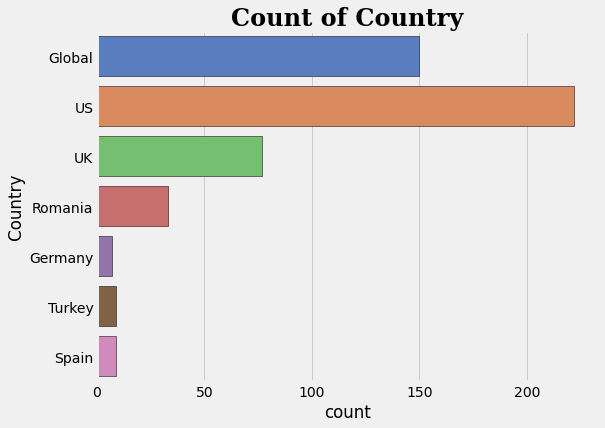

In [32]:
plt.figure(figsize=(8,6))
plt.style.use("fivethirtyeight")
plt.title("Count of Country",fontsize=24, fontweight='bold', fontfamily='serif')
sns.countplot(y=df['Country'],edgecolor='black', palette="muted")
plt.show()
plt.savefig('Category_over_Country.png',bbox_inches = "tight")

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


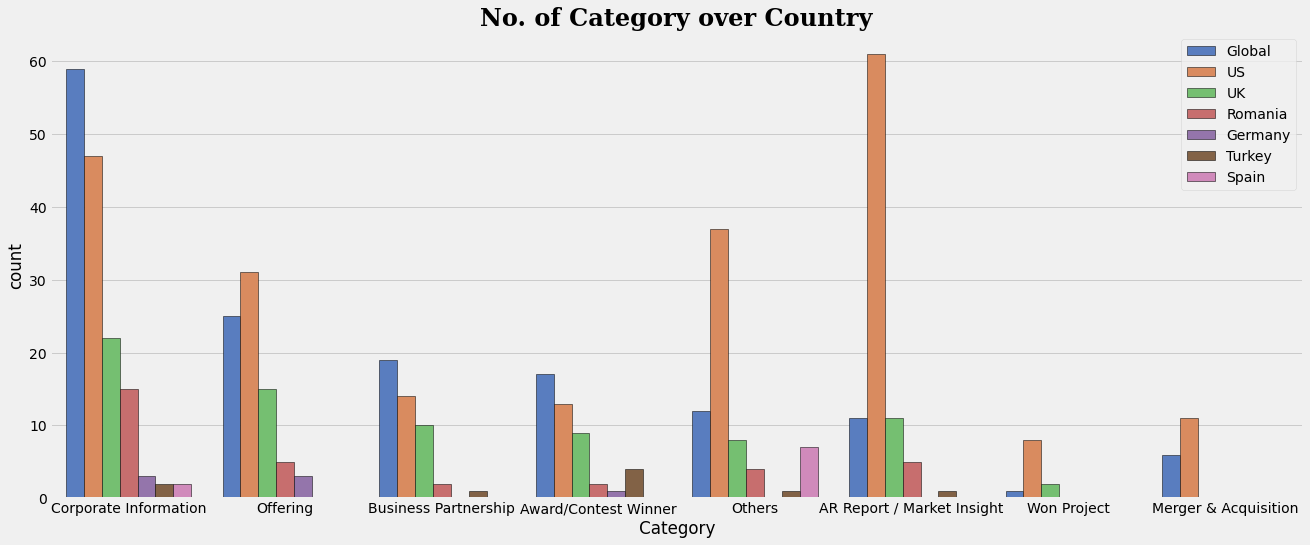

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.title("No. of Category over Country",fontsize=24, fontweight='bold', fontfamily='serif')
sns.countplot(df['Category'],edgecolor='black', palette="muted", hue = df["Country"])
plt.legend(loc='upper right')
plt.show()
plt.savefig('Category_over_Country.png',bbox_inches = "tight")

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


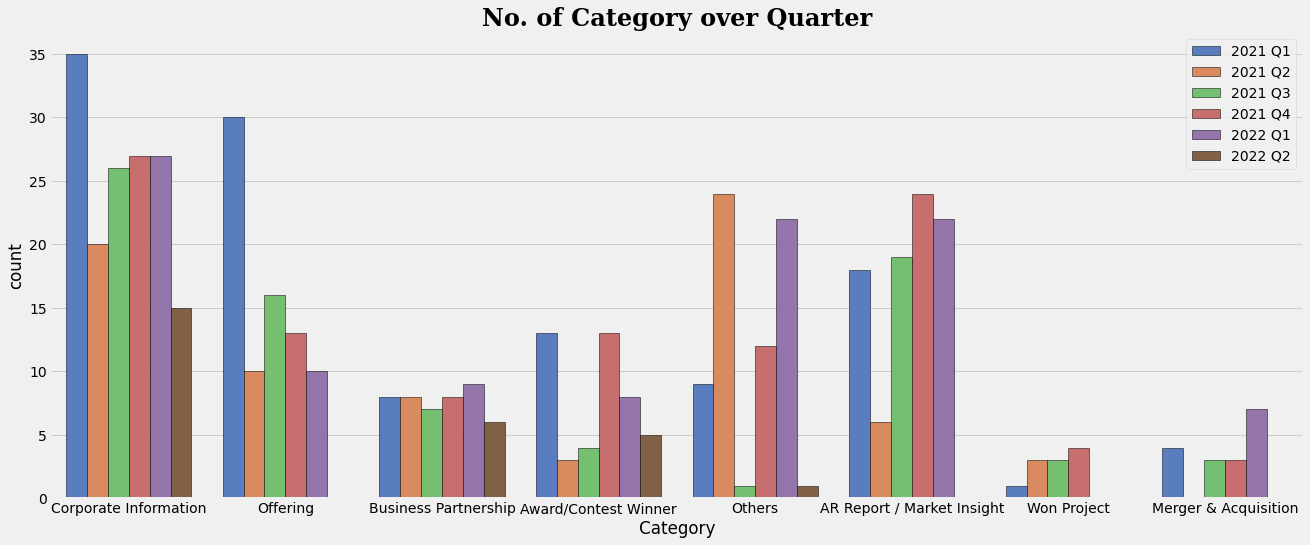

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.title("No. of Category over Quarter",fontsize=24, fontweight='bold', fontfamily='serif')
sns.countplot(df['Category'],edgecolor='black', palette="muted", hue = df["Quarter"])
plt.legend(loc='upper right')
plt.show()
plt.savefig('Category_over_Quarter.png',bbox_inches = "tight")

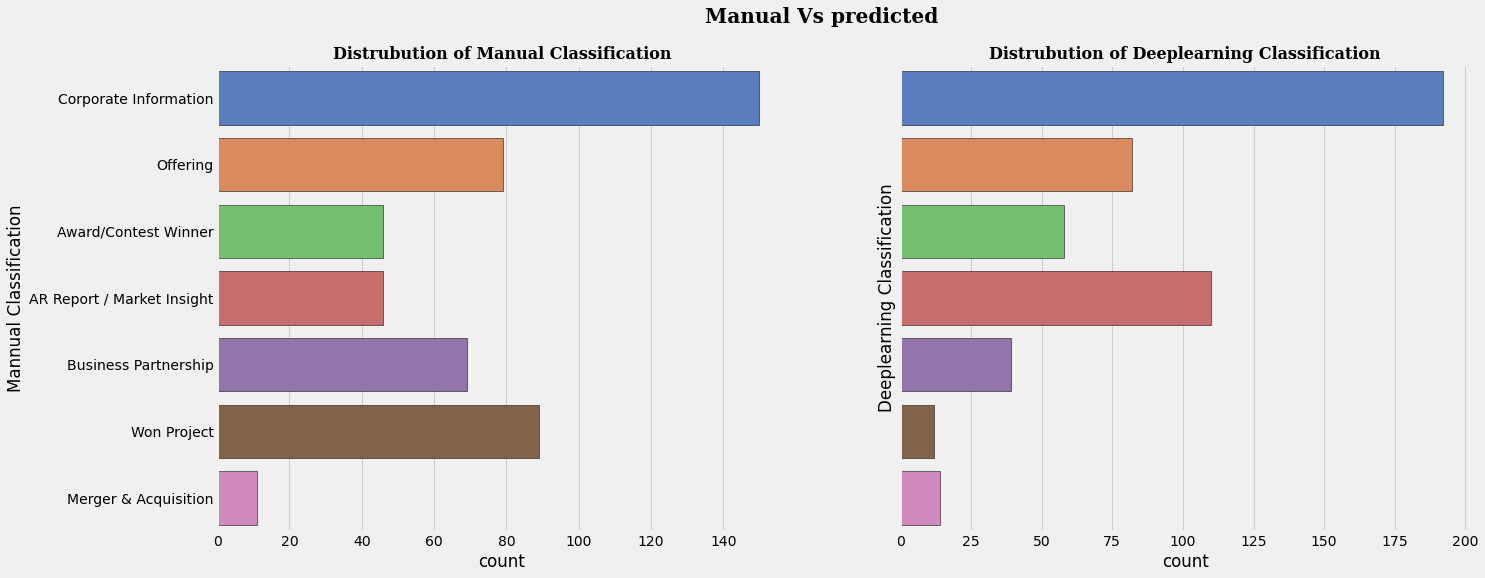

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Manual Vs predicted',fontsize=20, fontweight='bold', fontfamily='serif')

# actual
sns.countplot(y=df['Mannual Classification'],ax=axes[0],edgecolor='black', palette="muted")
axes[0].set_title("Distrubution of Manual Classification",fontsize=16, fontweight='bold', fontfamily='serif')


# pred
sns.countplot(y=df['Deeplearning Classification'],ax=axes[1],edgecolor='black', palette="muted")
axes[1].set_title("Distrubution of Deeplearning Classification",fontsize=16, fontweight='bold', fontfamily='serif');
fig.savefig('ManualvsPred.png',bbox_inches = "tight")

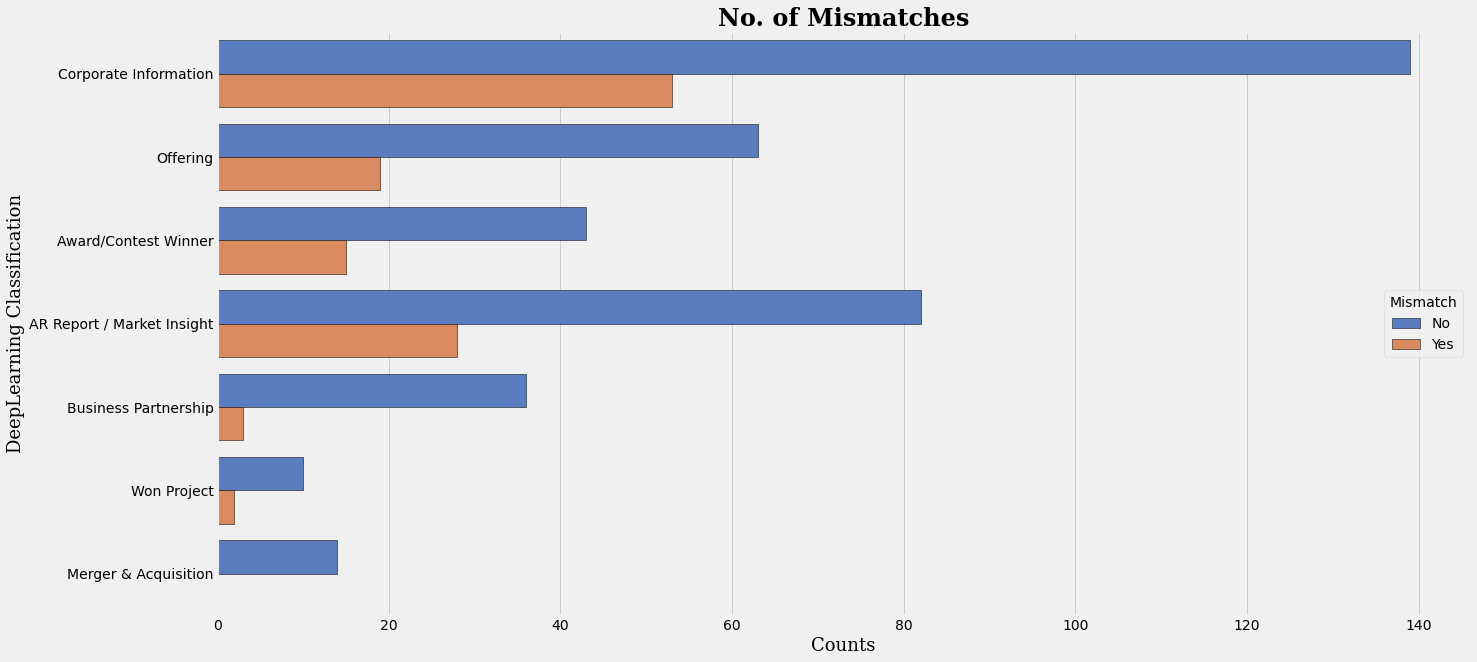

In [73]:
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.title("No. of Mismatches",fontsize=24, fontweight='bold', fontfamily='serif')
sns.countplot(y = df["Deeplearning Classification"],edgecolor='black', palette="muted", hue = df["Mismatch"], )
plt.xlabel("Counts",fontsize=18, fontfamily='serif')
plt.ylabel("DeepLearning Classification",fontsize=18, fontfamily='serif')
plt.savefig('mismatches.png',bbox_inches = "tight")